### Importación de datos



In [9]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación

---





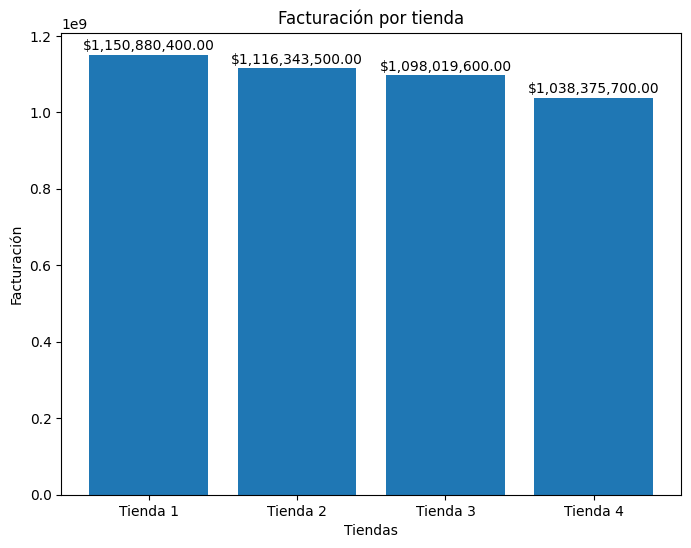

In [10]:
tiendas_analisis = [tienda, tienda2, tienda3, tienda4]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

def facturacion(tiendas_analisis):
  return [sum(tienda['Precio']) for tienda in tiendas_analisis]

ingresos = facturacion(tiendas_analisis)

plt.figure(figsize=(8,6))
plt.bar(tiendas, facturacion(tiendas_analisis))
plt.xlabel('Tiendas')
plt.ylabel('Facturación')
plt.title('Facturación por tienda')
for i, valor in enumerate(ingresos):
    plt.text(i, valor + max(ingresos)*0.01, f"${valor:,.2f}", ha='center')
plt.show()

# 2. Ventas por categoría

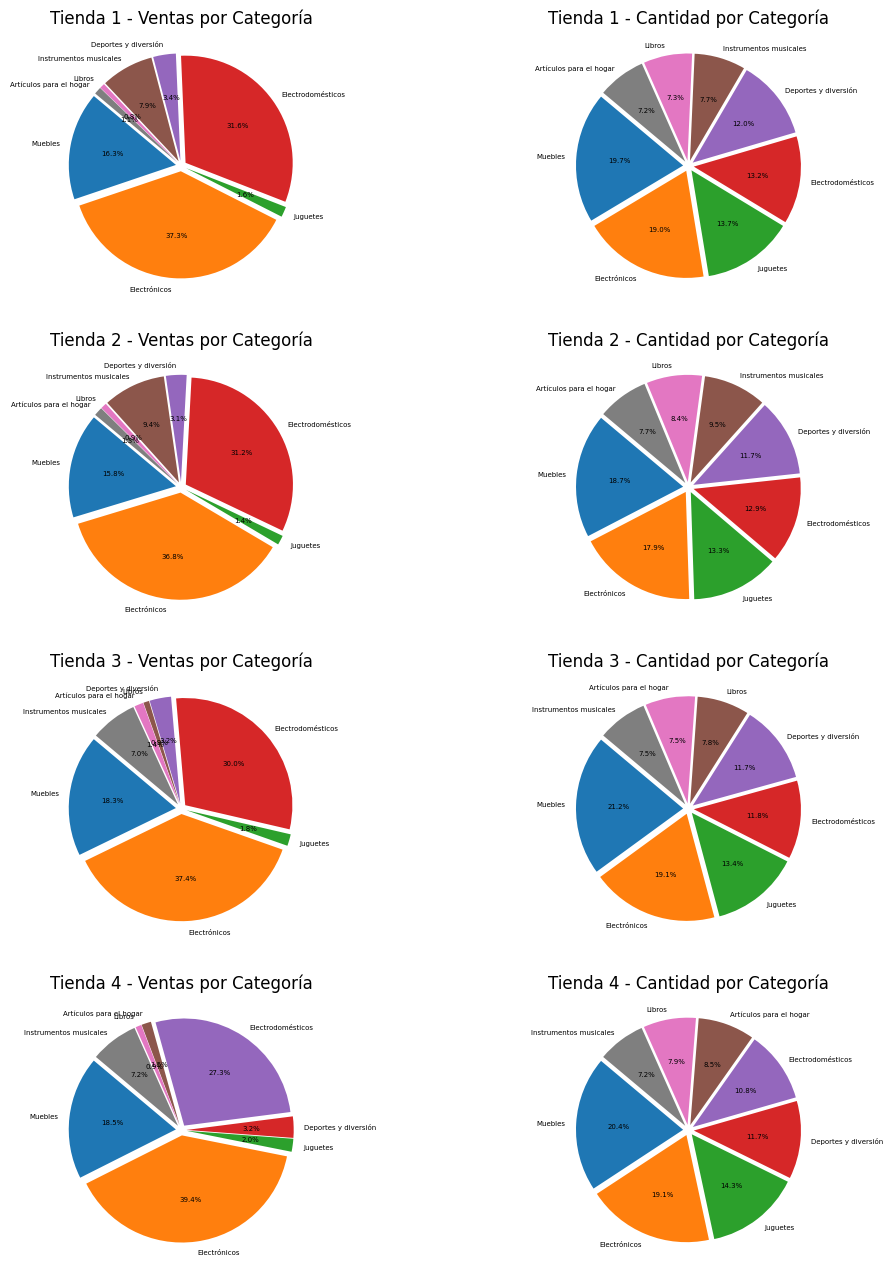

In [11]:
def ventas_categoria(df_tiendas):
  valores_agrupados = df_tiendas.groupby('Categoría del Producto')
  df_ventas = pd.DataFrame()
  df_ventas['Ventas'] = valores_agrupados['Precio'].sum()
  df_ventas['Cantidad'] = valores_agrupados.count()['Producto']
  return df_ventas.sort_values('Cantidad', ascending=False)

ventas_por_tienda = {
    tiendas: ventas_categoria(df)
    for tiendas, df in zip(tiendas,tiendas_analisis)
}

num_tiendas = len(tiendas)
fig, axs = plt.subplots(num_tiendas, 2, figsize=(12, 4 * num_tiendas))

for i, nombre in enumerate(tiendas):
    df_ventas = ventas_por_tienda[nombre]

    axs[i][0].pie(
        df_ventas['Ventas'],
        labels=df_ventas.index,
        autopct='%1.1f%%',
        startangle=140,
        textprops={'fontsize': 5},
        explode = [0.05] * len(df_ventas)
    )
    axs[i][0].set_title(f'{nombre} - Ventas por Categoría')

    axs[i][1].pie(
        df_ventas['Cantidad'],
        labels=df_ventas.index,
        autopct='%1.1f%%',
        startangle=140,
        textprops={'fontsize': 5},
        explode = [0.05] * len(df_ventas)
    )
    axs[i][1].set_title(f'{nombre} - Cantidad por Categoría')

plt.show()

# 3. Calificación promedio de la tienda


In [12]:
def calificacion_tienda(df_tiendas):
  df_agrupado = float(round(df_tiendas['Calificación'].mean(),2))
  return df_agrupado

calificacion_tienda = {
    tiendas: calificacion_tienda(df)
    for tiendas, df in zip(tiendas,tiendas_analisis)
}

calificacion_tienda

{'Tienda 1': 3.98, 'Tienda 2': 4.04, 'Tienda 3': 4.05, 'Tienda 4': 4.0}

# 4. Productos más y menos vendidos

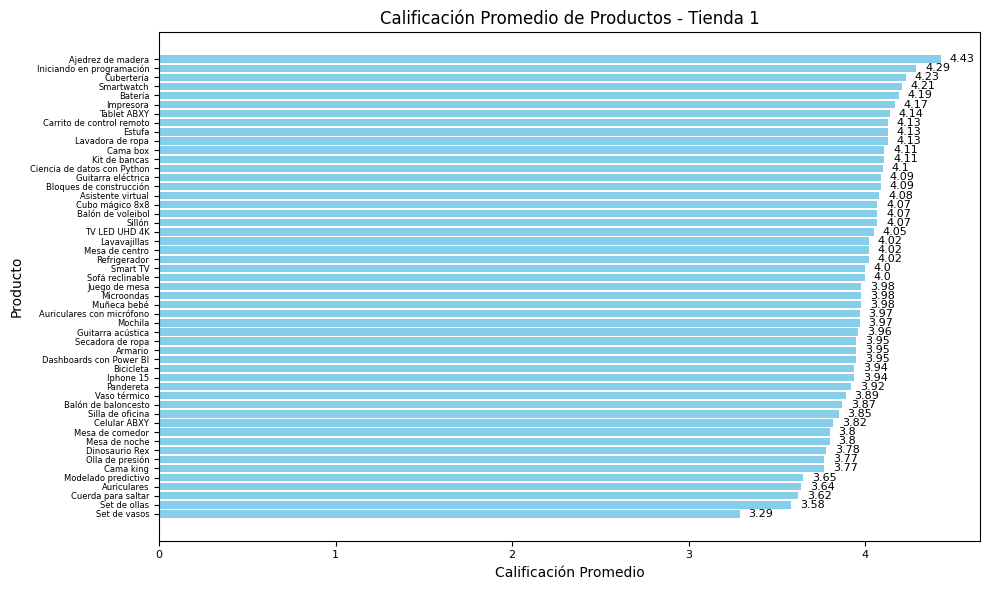

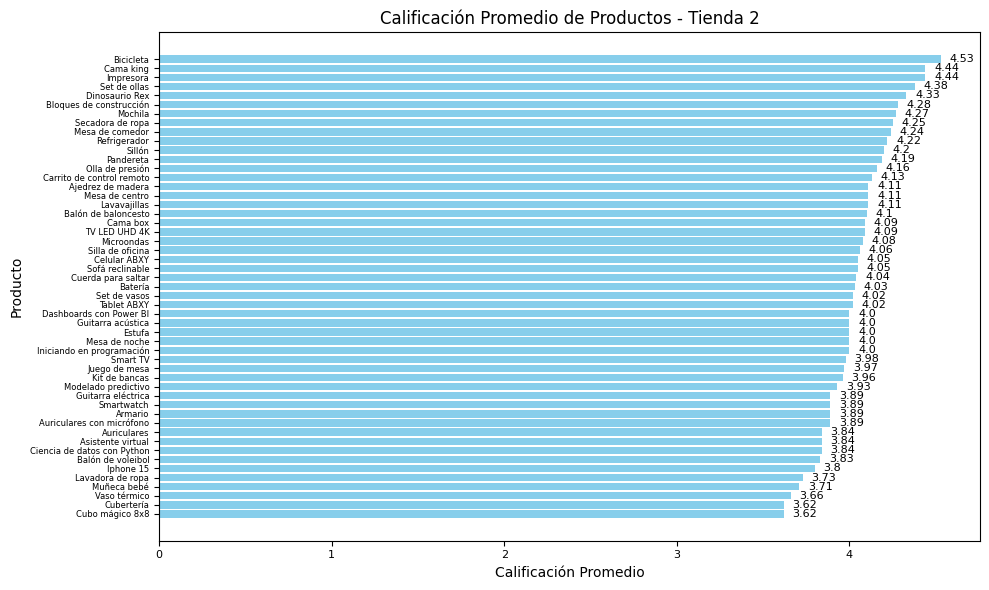

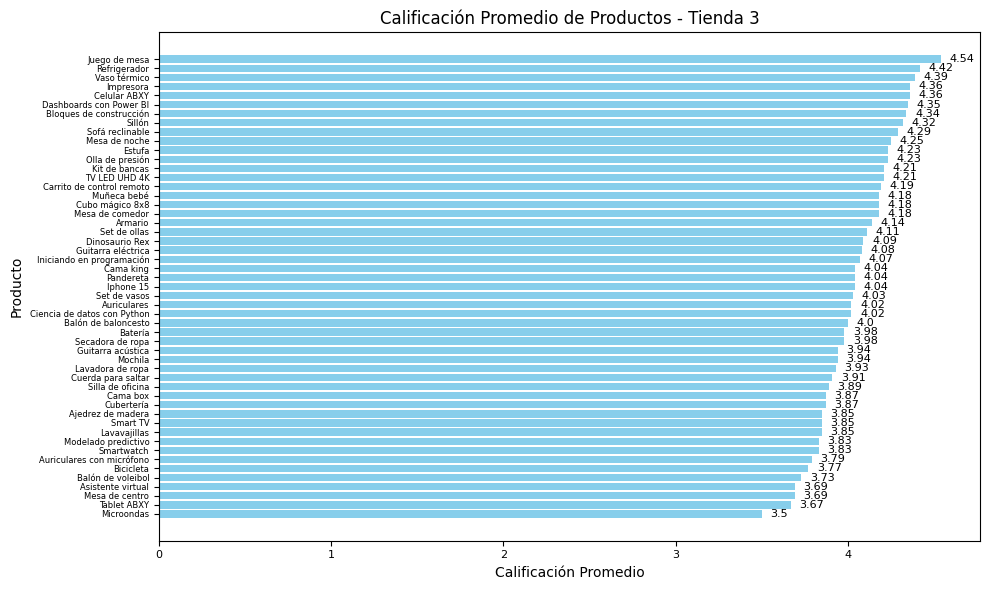

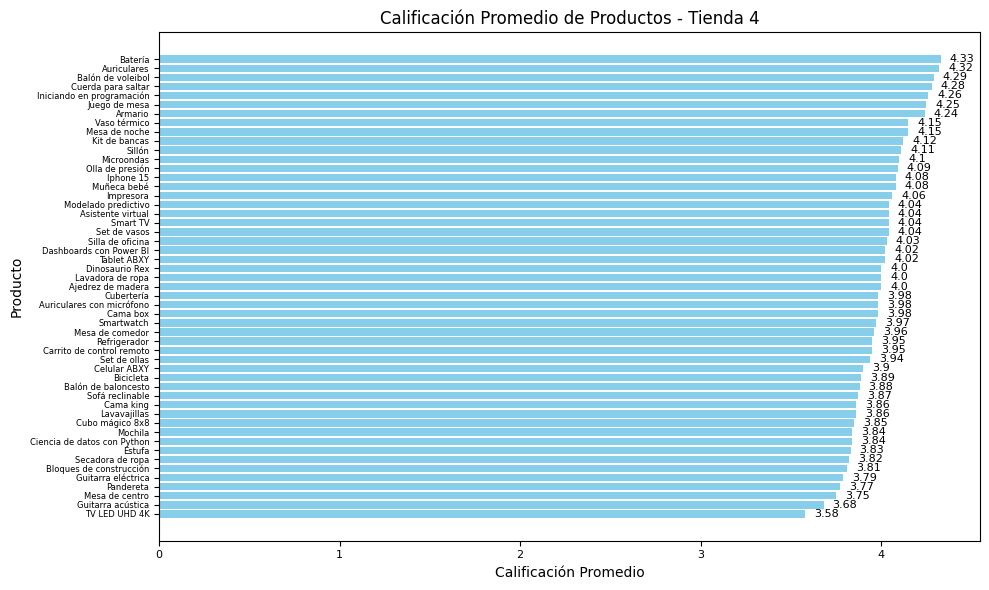

In [13]:
def calificacion_tienda(df_tiendas):
    df_agrupado = df_tiendas.groupby('Producto')
    df_tiendas = pd.DataFrame()
    df_tiendas['Calificación'] = round(df_agrupado['Calificación'].mean(), 2)
    return df_tiendas

calificacion_tienda = {
    tiendas: calificacion_tienda(df)
    for tiendas, df in zip(tiendas, tiendas_analisis)
}

for i, nombre in enumerate(tiendas):
    df_calificacion = calificacion_tienda[nombre]
    df_calificacion = df_calificacion.sort_values('Calificación', ascending=False)

    plt.figure(figsize=(10, 6))
    bars = plt.barh(df_calificacion.index, df_calificacion['Calificación'], height=0.8, color='skyblue')

    plt.xlabel('Calificación Promedio')
    plt.ylabel('Producto')
    plt.title(f'Calificación Promedio de Productos - {nombre}')
    plt.gca().invert_yaxis()
    plt.yticks(fontsize=6)
    plt.xticks(fontsize=8)

    for bar, value in zip(bars, df_calificacion['Calificación']):
        plt.text(bar.get_width() + 0.05, bar.get_y() + bar.get_height()/2,
                 f'{value}', va='center', ha='left', fontsize=8)

    plt.tight_layout()
    plt.show()

# 5. Envío promedio por tienda

In [14]:
def envio_promedio(df_tiendas):
  return float(round(df_tiendas['Costo de envío'].mean(),2))

envio_promedio = {
    tiendas: envio_promedio(df)
    for tiendas, df in zip(tiendas,tiendas_analisis)
}
envio_promedio

{'Tienda 1': 26018.61,
 'Tienda 2': 25216.24,
 'Tienda 3': 24805.68,
 'Tienda 4': 23459.46}

In [15]:
ingresos

[1150880400.0, 1116343500.0, 1098019600.0, 1038375700.0]

In [16]:
def envio_total(df_tiendas):
  return [float(tienda['Costo de envío'].sum()) for tienda in df_tiendas]

envio_costo = envio_total(tiendas_analisis)
envio_costo

rendimiento = [i-z for i, z in zip(ingresos, envio_costo)]

print("Ingresos:", ingresos)
print("Costo envio:", envio_costo)
print("Rendimiento:", rendimiento)

Ingresos: [1150880400.0, 1116343500.0, 1098019600.0, 1038375700.0]
Costo envio: [61377900.0, 59485100.0, 58516600.0, 55317400.0]
Rendimiento: [1089502500.0, 1056858400.0, 1039503000.0, 983058300.0]


In [17]:
print(rendimiento[0]-rendimiento[-1])
print(ingresos[0]-ingresos[-1])
print(envio_costo[0]-envio_costo[-1])

106444200.0
112504700.0
6060500.0


In [18]:
print(tienda['Calificación'].mean())
print(tienda2['Calificación'].mean())
print(tienda3['Calificación'].mean())
print(tienda4['Calificación'].mean())

3.976685036032217
4.037303942348453
4.048325561678677
3.9957591178965224


In [19]:
print(f"""De acuerdo a lo encontrado en el analisis de operaciones de cada tienda se obtienen los siguientes resultados:
    1. La tienda que mas ventas genera es la tienda 1 con un total de '{max(ingresos)}'
    2. La tienda que menos ventas genera es la tienda 4 con un total de '{min(ingresos)}'
    3. La tienda que genera menor costo de envio es la tienda 4 con un total de '{min(envio_costo)}'
    4. La tienda que genera mayor costo de envio es la tienda 1 con un total de '{max(envio_costo)}'
    5. La tienda que genera mayor rendimiento es la tienda 1 con un total de '{max(rendimiento)}'
    6. La tienda que genera menor rendimiento es la tienda 4 con un total de '{min(rendimiento)}'
Teniedo en cuanta ello, se recomienda vender la tienda numero 4.
""")

De acuerdo a lo encontrado en el analisis de operaciones de cada tienda se obtienen los siguientes resultados:
    1. La tienda que mas ventas genera es la tienda 1 con un total de '1150880400.0'
    2. La tienda que menos ventas genera es la tienda 4 con un total de '1038375700.0'
    3. La tienda que genera menor costo de envio es la tienda 4 con un total de '55317400.0'
    4. La tienda que genera mayor costo de envio es la tienda 1 con un total de '61377900.0'
    5. La tienda que genera mayor rendimiento es la tienda 1 con un total de '1089502500.0'
    6. La tienda que genera menor rendimiento es la tienda 4 con un total de '983058300.0'
Teniedo en cuanta ello, se recomienda vender la tienda numero 4.

